In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

LOAD  DATA

In [5]:
df = pd.read_csv('../../data/normalize/integrated_data.csv')
df['TANGGAL'] = pd.to_datetime(df['TANGGAL'])
df.shape

(269, 16)

In [6]:
df

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR,tweet_count,hujan_mention,banjir_mention,macet_mention,Month
0,2023-08-09,23.8,32.8,28.1,65.0,0.0,8.9,8.0,110.0,3.0,E,0.0,0.0,0.0,0.0,August
1,2023-08-10,23.4,32.4,27.7,60.0,0.0,8.0,6.0,130.0,3.0,E,0.0,0.0,0.0,0.0,August
2,2023-08-11,22.2,32.6,27.8,62.0,0.0,8.8,5.0,100.0,3.0,E,0.0,0.0,0.0,0.0,August
3,2023-08-12,23.0,33.2,28.3,61.0,0.0,8.8,8.0,90.0,2.0,C,0.0,0.0,0.0,0.0,August
4,2023-08-13,23.0,32.7,28.6,64.0,0.0,8.7,6.0,80.0,2.0,E,0.0,0.0,0.0,0.0,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2023-09-26,23.5,35.0,29.3,58.0,0.0,8.8,7.0,100.0,2.0,E,0.0,0.0,0.0,0.0,September
265,2023-09-27,23.8,35.0,29.3,61.0,0.0,9.0,7.0,100.0,3.0,E,0.0,0.0,0.0,0.0,September
266,2023-09-28,24.0,34.8,29.7,62.0,0.0,8.8,8.0,110.0,4.0,E,0.0,0.0,0.0,0.0,September
267,2023-09-29,25.6,34.4,29.9,64.0,0.0,8.8,9.0,110.0,4.0,E,0.0,0.0,0.0,0.0,September


# FEATURE ENGINEERING

In [7]:
df['day_of_week'] = df['TANGGAL'].dt.dayofweek  # 0=Monday, 6=Sunday

In [8]:
df

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR,tweet_count,hujan_mention,banjir_mention,macet_mention,Month,day_of_week
0,2023-08-09,23.8,32.8,28.1,65.0,0.0,8.9,8.0,110.0,3.0,E,0.0,0.0,0.0,0.0,August,2
1,2023-08-10,23.4,32.4,27.7,60.0,0.0,8.0,6.0,130.0,3.0,E,0.0,0.0,0.0,0.0,August,3
2,2023-08-11,22.2,32.6,27.8,62.0,0.0,8.8,5.0,100.0,3.0,E,0.0,0.0,0.0,0.0,August,4
3,2023-08-12,23.0,33.2,28.3,61.0,0.0,8.8,8.0,90.0,2.0,C,0.0,0.0,0.0,0.0,August,5
4,2023-08-13,23.0,32.7,28.6,64.0,0.0,8.7,6.0,80.0,2.0,E,0.0,0.0,0.0,0.0,August,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2023-09-26,23.5,35.0,29.3,58.0,0.0,8.8,7.0,100.0,2.0,E,0.0,0.0,0.0,0.0,September,1
265,2023-09-27,23.8,35.0,29.3,61.0,0.0,9.0,7.0,100.0,3.0,E,0.0,0.0,0.0,0.0,September,2
266,2023-09-28,24.0,34.8,29.7,62.0,0.0,8.8,8.0,110.0,4.0,E,0.0,0.0,0.0,0.0,September,3
267,2023-09-29,25.6,34.4,29.9,64.0,0.0,8.8,9.0,110.0,4.0,E,0.0,0.0,0.0,0.0,September,4


In [9]:
df['day_name'] = df['TANGGAL'].dt.day_name()

In [10]:
df

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR,tweet_count,hujan_mention,banjir_mention,macet_mention,Month,day_of_week,day_name
0,2023-08-09,23.8,32.8,28.1,65.0,0.0,8.9,8.0,110.0,3.0,E,0.0,0.0,0.0,0.0,August,2,Wednesday
1,2023-08-10,23.4,32.4,27.7,60.0,0.0,8.0,6.0,130.0,3.0,E,0.0,0.0,0.0,0.0,August,3,Thursday
2,2023-08-11,22.2,32.6,27.8,62.0,0.0,8.8,5.0,100.0,3.0,E,0.0,0.0,0.0,0.0,August,4,Friday
3,2023-08-12,23.0,33.2,28.3,61.0,0.0,8.8,8.0,90.0,2.0,C,0.0,0.0,0.0,0.0,August,5,Saturday
4,2023-08-13,23.0,32.7,28.6,64.0,0.0,8.7,6.0,80.0,2.0,E,0.0,0.0,0.0,0.0,August,6,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2023-09-26,23.5,35.0,29.3,58.0,0.0,8.8,7.0,100.0,2.0,E,0.0,0.0,0.0,0.0,September,1,Tuesday
265,2023-09-27,23.8,35.0,29.3,61.0,0.0,9.0,7.0,100.0,3.0,E,0.0,0.0,0.0,0.0,September,2,Wednesday
266,2023-09-28,24.0,34.8,29.7,62.0,0.0,8.8,8.0,110.0,4.0,E,0.0,0.0,0.0,0.0,September,3,Thursday
267,2023-09-29,25.6,34.4,29.9,64.0,0.0,8.8,9.0,110.0,4.0,E,0.0,0.0,0.0,0.0,September,4,Friday


In [11]:
df['week_of_year'] = df['TANGGAL'].dt.isocalendar().week

In [12]:
df

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR,tweet_count,hujan_mention,banjir_mention,macet_mention,Month,day_of_week,day_name,week_of_year
0,2023-08-09,23.8,32.8,28.1,65.0,0.0,8.9,8.0,110.0,3.0,E,0.0,0.0,0.0,0.0,August,2,Wednesday,32
1,2023-08-10,23.4,32.4,27.7,60.0,0.0,8.0,6.0,130.0,3.0,E,0.0,0.0,0.0,0.0,August,3,Thursday,32
2,2023-08-11,22.2,32.6,27.8,62.0,0.0,8.8,5.0,100.0,3.0,E,0.0,0.0,0.0,0.0,August,4,Friday,32
3,2023-08-12,23.0,33.2,28.3,61.0,0.0,8.8,8.0,90.0,2.0,C,0.0,0.0,0.0,0.0,August,5,Saturday,32
4,2023-08-13,23.0,32.7,28.6,64.0,0.0,8.7,6.0,80.0,2.0,E,0.0,0.0,0.0,0.0,August,6,Sunday,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2023-09-26,23.5,35.0,29.3,58.0,0.0,8.8,7.0,100.0,2.0,E,0.0,0.0,0.0,0.0,September,1,Tuesday,39
265,2023-09-27,23.8,35.0,29.3,61.0,0.0,9.0,7.0,100.0,3.0,E,0.0,0.0,0.0,0.0,September,2,Wednesday,39
266,2023-09-28,24.0,34.8,29.7,62.0,0.0,8.8,8.0,110.0,4.0,E,0.0,0.0,0.0,0.0,September,3,Thursday,39
267,2023-09-29,25.6,34.4,29.9,64.0,0.0,8.8,9.0,110.0,4.0,E,0.0,0.0,0.0,0.0,September,4,Friday,39


In [13]:
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
print("Created: day_of_week, day_name, week_of_year, is_weekend")

Created: day_of_week, day_name, week_of_year, is_weekend


Weather-based Features

In [14]:
# Temperature range
df['temp_range'] = df['TX'] - df['TN']


In [15]:
df

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,...,tweet_count,hujan_mention,banjir_mention,macet_mention,Month,day_of_week,day_name,week_of_year,is_weekend,temp_range
0,2023-08-09,23.8,32.8,28.1,65.0,0.0,8.9,8.0,110.0,3.0,...,0.0,0.0,0.0,0.0,August,2,Wednesday,32,0,9.0
1,2023-08-10,23.4,32.4,27.7,60.0,0.0,8.0,6.0,130.0,3.0,...,0.0,0.0,0.0,0.0,August,3,Thursday,32,0,9.0
2,2023-08-11,22.2,32.6,27.8,62.0,0.0,8.8,5.0,100.0,3.0,...,0.0,0.0,0.0,0.0,August,4,Friday,32,0,10.4
3,2023-08-12,23.0,33.2,28.3,61.0,0.0,8.8,8.0,90.0,2.0,...,0.0,0.0,0.0,0.0,August,5,Saturday,32,1,10.2
4,2023-08-13,23.0,32.7,28.6,64.0,0.0,8.7,6.0,80.0,2.0,...,0.0,0.0,0.0,0.0,August,6,Sunday,32,1,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2023-09-26,23.5,35.0,29.3,58.0,0.0,8.8,7.0,100.0,2.0,...,0.0,0.0,0.0,0.0,September,1,Tuesday,39,0,11.5
265,2023-09-27,23.8,35.0,29.3,61.0,0.0,9.0,7.0,100.0,3.0,...,0.0,0.0,0.0,0.0,September,2,Wednesday,39,0,11.2
266,2023-09-28,24.0,34.8,29.7,62.0,0.0,8.8,8.0,110.0,4.0,...,0.0,0.0,0.0,0.0,September,3,Thursday,39,0,10.8
267,2023-09-29,25.6,34.4,29.9,64.0,0.0,8.8,9.0,110.0,4.0,...,0.0,0.0,0.0,0.0,September,4,Friday,39,0,8.8


In [16]:
# Heat Index (simplified)
df['heat_index'] = df['TAVG'] + 0.5 * df['RH_AVG']/10

In [17]:
df

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,...,hujan_mention,banjir_mention,macet_mention,Month,day_of_week,day_name,week_of_year,is_weekend,temp_range,heat_index
0,2023-08-09,23.8,32.8,28.1,65.0,0.0,8.9,8.0,110.0,3.0,...,0.0,0.0,0.0,August,2,Wednesday,32,0,9.0,31.35
1,2023-08-10,23.4,32.4,27.7,60.0,0.0,8.0,6.0,130.0,3.0,...,0.0,0.0,0.0,August,3,Thursday,32,0,9.0,30.70
2,2023-08-11,22.2,32.6,27.8,62.0,0.0,8.8,5.0,100.0,3.0,...,0.0,0.0,0.0,August,4,Friday,32,0,10.4,30.90
3,2023-08-12,23.0,33.2,28.3,61.0,0.0,8.8,8.0,90.0,2.0,...,0.0,0.0,0.0,August,5,Saturday,32,1,10.2,31.35
4,2023-08-13,23.0,32.7,28.6,64.0,0.0,8.7,6.0,80.0,2.0,...,0.0,0.0,0.0,August,6,Sunday,32,1,9.7,31.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2023-09-26,23.5,35.0,29.3,58.0,0.0,8.8,7.0,100.0,2.0,...,0.0,0.0,0.0,September,1,Tuesday,39,0,11.5,32.20
265,2023-09-27,23.8,35.0,29.3,61.0,0.0,9.0,7.0,100.0,3.0,...,0.0,0.0,0.0,September,2,Wednesday,39,0,11.2,32.35
266,2023-09-28,24.0,34.8,29.7,62.0,0.0,8.8,8.0,110.0,4.0,...,0.0,0.0,0.0,September,3,Thursday,39,0,10.8,32.80
267,2023-09-29,25.6,34.4,29.9,64.0,0.0,8.8,9.0,110.0,4.0,...,0.0,0.0,0.0,September,4,Friday,39,0,8.8,33.10


In [18]:
# Rain intensity category
df['rain_category'] = pd.cut(df['RR'], 
                              bins=[-0.1, 0, 5, 20, 50, 200], 
                              labels=['No Rain', 'Light', 'Moderate', 'Heavy', 'Extreme'])

In [19]:
df

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,...,banjir_mention,macet_mention,Month,day_of_week,day_name,week_of_year,is_weekend,temp_range,heat_index,rain_category
0,2023-08-09,23.8,32.8,28.1,65.0,0.0,8.9,8.0,110.0,3.0,...,0.0,0.0,August,2,Wednesday,32,0,9.0,31.35,No Rain
1,2023-08-10,23.4,32.4,27.7,60.0,0.0,8.0,6.0,130.0,3.0,...,0.0,0.0,August,3,Thursday,32,0,9.0,30.70,No Rain
2,2023-08-11,22.2,32.6,27.8,62.0,0.0,8.8,5.0,100.0,3.0,...,0.0,0.0,August,4,Friday,32,0,10.4,30.90,No Rain
3,2023-08-12,23.0,33.2,28.3,61.0,0.0,8.8,8.0,90.0,2.0,...,0.0,0.0,August,5,Saturday,32,1,10.2,31.35,No Rain
4,2023-08-13,23.0,32.7,28.6,64.0,0.0,8.7,6.0,80.0,2.0,...,0.0,0.0,August,6,Sunday,32,1,9.7,31.80,No Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2023-09-26,23.5,35.0,29.3,58.0,0.0,8.8,7.0,100.0,2.0,...,0.0,0.0,September,1,Tuesday,39,0,11.5,32.20,No Rain
265,2023-09-27,23.8,35.0,29.3,61.0,0.0,9.0,7.0,100.0,3.0,...,0.0,0.0,September,2,Wednesday,39,0,11.2,32.35,No Rain
266,2023-09-28,24.0,34.8,29.7,62.0,0.0,8.8,8.0,110.0,4.0,...,0.0,0.0,September,3,Thursday,39,0,10.8,32.80,No Rain
267,2023-09-29,25.6,34.4,29.9,64.0,0.0,8.8,9.0,110.0,4.0,...,0.0,0.0,September,4,Friday,39,0,8.8,33.10,No Rain


In [20]:
# Cumulative rainfall (rolling sum)
df['rainfall_3day'] = df['RR'].rolling(window=3, min_periods=1).sum()
df['rainfall_7day'] = df['RR'].rolling(window=7, min_periods=1).sum()

In [21]:
df

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,...,Month,day_of_week,day_name,week_of_year,is_weekend,temp_range,heat_index,rain_category,rainfall_3day,rainfall_7day
0,2023-08-09,23.8,32.8,28.1,65.0,0.0,8.9,8.0,110.0,3.0,...,August,2,Wednesday,32,0,9.0,31.35,No Rain,0.0,0.0
1,2023-08-10,23.4,32.4,27.7,60.0,0.0,8.0,6.0,130.0,3.0,...,August,3,Thursday,32,0,9.0,30.70,No Rain,0.0,0.0
2,2023-08-11,22.2,32.6,27.8,62.0,0.0,8.8,5.0,100.0,3.0,...,August,4,Friday,32,0,10.4,30.90,No Rain,0.0,0.0
3,2023-08-12,23.0,33.2,28.3,61.0,0.0,8.8,8.0,90.0,2.0,...,August,5,Saturday,32,1,10.2,31.35,No Rain,0.0,0.0
4,2023-08-13,23.0,32.7,28.6,64.0,0.0,8.7,6.0,80.0,2.0,...,August,6,Sunday,32,1,9.7,31.80,No Rain,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2023-09-26,23.5,35.0,29.3,58.0,0.0,8.8,7.0,100.0,2.0,...,September,1,Tuesday,39,0,11.5,32.20,No Rain,0.0,0.0
265,2023-09-27,23.8,35.0,29.3,61.0,0.0,9.0,7.0,100.0,3.0,...,September,2,Wednesday,39,0,11.2,32.35,No Rain,0.0,0.0
266,2023-09-28,24.0,34.8,29.7,62.0,0.0,8.8,8.0,110.0,4.0,...,September,3,Thursday,39,0,10.8,32.80,No Rain,0.0,0.0
267,2023-09-29,25.6,34.4,29.9,64.0,0.0,8.8,9.0,110.0,4.0,...,September,4,Friday,39,0,8.8,33.10,No Rain,0.0,0.0


In [22]:
# Weather condition (based on multiple factors)
def categorize_weather(row):
    if row['RR'] > 20:
        return 'Rainy'
    elif row['RH_AVG'] > 80:
        return 'Humid'
    elif row['TAVG'] > 30:
        return 'Hot'
    else:
        return 'Normal'

df['weather_condition'] = df.apply(categorize_weather, axis=1)

print("Created: temp_range, heat_index, rain_category, rainfall_3day, rainfall_7day, weather_condition")

Created: temp_range, heat_index, rain_category, rainfall_3day, rainfall_7day, weather_condition


In [23]:
df

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,...,day_of_week,day_name,week_of_year,is_weekend,temp_range,heat_index,rain_category,rainfall_3day,rainfall_7day,weather_condition
0,2023-08-09,23.8,32.8,28.1,65.0,0.0,8.9,8.0,110.0,3.0,...,2,Wednesday,32,0,9.0,31.35,No Rain,0.0,0.0,Normal
1,2023-08-10,23.4,32.4,27.7,60.0,0.0,8.0,6.0,130.0,3.0,...,3,Thursday,32,0,9.0,30.70,No Rain,0.0,0.0,Normal
2,2023-08-11,22.2,32.6,27.8,62.0,0.0,8.8,5.0,100.0,3.0,...,4,Friday,32,0,10.4,30.90,No Rain,0.0,0.0,Normal
3,2023-08-12,23.0,33.2,28.3,61.0,0.0,8.8,8.0,90.0,2.0,...,5,Saturday,32,1,10.2,31.35,No Rain,0.0,0.0,Normal
4,2023-08-13,23.0,32.7,28.6,64.0,0.0,8.7,6.0,80.0,2.0,...,6,Sunday,32,1,9.7,31.80,No Rain,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2023-09-26,23.5,35.0,29.3,58.0,0.0,8.8,7.0,100.0,2.0,...,1,Tuesday,39,0,11.5,32.20,No Rain,0.0,0.0,Normal
265,2023-09-27,23.8,35.0,29.3,61.0,0.0,9.0,7.0,100.0,3.0,...,2,Wednesday,39,0,11.2,32.35,No Rain,0.0,0.0,Normal
266,2023-09-28,24.0,34.8,29.7,62.0,0.0,8.8,8.0,110.0,4.0,...,3,Thursday,39,0,10.8,32.80,No Rain,0.0,0.0,Normal
267,2023-09-29,25.6,34.4,29.9,64.0,0.0,8.8,9.0,110.0,4.0,...,4,Friday,39,0,8.8,33.10,No Rain,0.0,0.0,Normal


Wind Features

In [24]:
df['wind_category'] = pd.cut(df['FF_AVG'], 
                              bins=[0, 2, 4, 6, 100], 
                              labels=['Calm', 'Light', 'Moderate', 'Strong'])

In [25]:
# Wind direction simplification
direction_map = {
    'C': 'Calm', 'NW': 'North', 'N': 'North', 'NE': 'North',
    'W': 'West', 'E': 'East',
    'SW': 'South', 'S': 'South', 'SE': 'South'
}

In [26]:
df['wind_direction_simple'] = df['DDD_CAR'].map(direction_map).fillna('Unknown')

print("  ✓ Created: wind_category, wind_direction_simple")

  ✓ Created: wind_category, wind_direction_simple


Social Media Engagement Features

In [27]:
# Engagement rate
df['engagement_rate'] = df['hujan_mention'] / (df['tweet_count'] + 1)  # +1 to avoid division by zero

In [28]:
# Flood risk indicator (based on mentions)
df['flood_risk_score'] = (df['banjir_mention'] * 3 + 
                           df['macet_mention'] * 1 + 
                           df['hujan_mention'] * 2) / 6

In [29]:
# Social media activity level
df['social_activity_level'] = pd.cut(df['tweet_count'], 
                                      bins=[-0.1, 0, 5, 15, 100], 
                                      labels=['None', 'Low', 'Medium', 'High'])

In [30]:
# Weather awareness (tweets when actual rain)
df['weather_awareness'] = ((df['RR'] > 5) & (df['hujan_mention'] > 0)).astype(int)

print("Created: engagement_rate, flood_risk_score, social_activity_level, weather_awareness")

Created: engagement_rate, flood_risk_score, social_activity_level, weather_awareness


Interaction Features

In [31]:
# Rain × Humidity interaction
df['rain_humidity_interaction'] = df['RR'] * df['RH_AVG'] / 100

In [32]:
# Temperature × Sunlight interaction
df['temp_sunlight_interaction'] = df['TAVG'] * df['SS']

In [33]:
# Rain × Social Media
df['rain_social_interaction'] = df['RR'] * df['tweet_count']

In [34]:
print("  ✓ Created: rain_humidity_interaction, temp_sunlight_interaction, rain_social_interaction")

  ✓ Created: rain_humidity_interaction, temp_sunlight_interaction, rain_social_interaction


Lag Features (Previous day values)

In [35]:
df['RR_lag1'] = df['RR'].shift(1)  # Previous day rainfall
df['TAVG_lag1'] = df['TAVG'].shift(1)  # Previous day temperature
df['tweet_count_lag1'] = df['tweet_count'].shift(1)  # Previous day tweets

In [36]:
# Fill first row NaN with 0
df[['RR_lag1', 'TAVG_lag1', 'tweet_count_lag1']] = \
    df[['RR_lag1', 'TAVG_lag1', 'tweet_count_lag1']].fillna(0)

print("Created: RR_lag1, TAVG_lag1, tweet_count_lag1")


Created: RR_lag1, TAVG_lag1, tweet_count_lag1


In [37]:
print(f"\nTotal Features: {df.shape[1]} columns")


Total Features: 38 columns


# Analysis engineered feature

Correlation Analysis

In [38]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

In [39]:
rain_corr = corr_matrix['RR'].abs().sort_values(ascending=False)[1:6]
print("\nTop 5 Features Correlated with Rainfall:")
for feat, corr in rain_corr.items():
    print(f"  - {feat}: {corr:.3f}")


Top 5 Features Correlated with Rainfall:
  - rain_humidity_interaction: 0.996
  - rainfall_3day: 0.571
  - rainfall_7day: 0.333
  - SS: 0.205
  - temp_sunlight_interaction: 0.199


Stat test

In [40]:
# T-test: Rainfall on weekdays vs weekends
weekend_rain = df[df['is_weekend'] == 1]['RR']
weekday_rain = df[df['is_weekend'] == 0]['RR']
t_stat, p_value = stats.ttest_ind(weekend_rain, weekday_rain)
print(f"  Rainfall Weekday vs Weekend: t={t_stat:.3f}, p={p_value:.3f}")

  Rainfall Weekday vs Weekend: t=-0.170, p=0.865


In [41]:
# Chi-square: Rain category vs Social activity
if len(df) > 0:
    contingency_table = pd.crosstab(df['rain_category'], df['social_activity_level'])
    chi2, p_chi, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"  Rain Category vs Social Activity: χ²={chi2:.3f}, p={p_chi:.3f}")

  Rain Category vs Social Activity: χ²=42.619, p=0.000


Grouping Analysis

In [42]:
# By weather condition
weather_stats = df.groupby('weather_condition').agg({
    'RR': ['mean', 'sum'],
    'TAVG': 'mean',
    'tweet_count': 'sum',
    'hujan_mention': 'sum'
}).round(2)
print("\nWeather Condition Statistics:")
print(weather_stats)


Weather Condition Statistics:
                        RR             TAVG tweet_count hujan_mention
                      mean       sum   mean         sum           sum
weather_condition                                                    
Hot                   0.46      22.7  30.83         0.0           0.0
Humid                 6.73     235.4  27.51        40.0          23.0
Normal                0.79     118.6  28.87         0.0           0.0
Rainy              3946.24  134172.3  28.57         8.0           6.0


In [43]:
# By week
weekly_stats = df.groupby('week_of_year').agg({
    'RR': 'sum',
    'TAVG': 'mean',
    'tweet_count': 'sum',
    'flood_risk_score': 'mean'
}).round(2)
print("\nWeekly Statistics:")
print(weekly_stats)


Weekly Statistics:
                   RR   TAVG  tweet_count  flood_risk_score
week_of_year                                               
2               107.6  28.56          0.0              0.00
3                74.7  27.64          5.0              0.24
4              9008.8  27.20          5.0              0.38
5                12.2  28.25          0.0              0.00
6                75.8  27.22          5.0              0.46
7               207.8  27.16          6.0              0.29
8               140.5  27.80         27.0              2.33
9              8896.5  27.00          0.0              0.00
10               49.6  29.22          0.0              0.00
11             8888.2  28.81          0.0              0.00
12               30.3  28.69          0.0              0.00
13             8905.8  27.56          0.0              0.00
14               78.5  28.10          0.0              0.00
15              119.7  28.57          0.0              0.00
16             8898.

Outlier Detection

In [44]:
Q1 = df['RR'].quantile(0.25)
Q3 = df['RR'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['RR'] < Q1 - 1.5*IQR) | (df['RR'] > Q3 + 1.5*IQR)]
print(f"  Found {len(outliers)} outlier days with extreme rainfall")
if len(outliers) > 0:
    print(f"  Outlier dates: {outliers['TANGGAL'].dt.date.tolist()}")

  Found 45 outlier days with extreme rainfall
  Outlier dates: [datetime.date(2023, 4, 9), datetime.date(2023, 4, 10), datetime.date(2023, 4, 11), datetime.date(2023, 4, 13), datetime.date(2023, 4, 15), datetime.date(2023, 4, 16), datetime.date(2023, 4, 20), datetime.date(2023, 4, 29), datetime.date(2023, 12, 9), datetime.date(2023, 12, 10), datetime.date(2023, 12, 11), datetime.date(2023, 12, 16), datetime.date(2023, 12, 22), datetime.date(2023, 12, 26), datetime.date(2023, 12, 31), datetime.date(2023, 2, 9), datetime.date(2023, 2, 10), datetime.date(2023, 2, 13), datetime.date(2023, 2, 15), datetime.date(2023, 2, 17), datetime.date(2023, 2, 19), datetime.date(2023, 2, 20), datetime.date(2023, 2, 21), datetime.date(2023, 2, 22), datetime.date(2023, 2, 27), datetime.date(2023, 1, 9), datetime.date(2023, 1, 10), datetime.date(2023, 1, 12), datetime.date(2023, 1, 14), datetime.date(2023, 1, 18), datetime.date(2023, 1, 22), datetime.date(2023, 1, 23), datetime.date(2023, 1, 25), datetime.

# Visualization

Text(0.5, 0.995, 'Feature Engineering Analysis 2023')

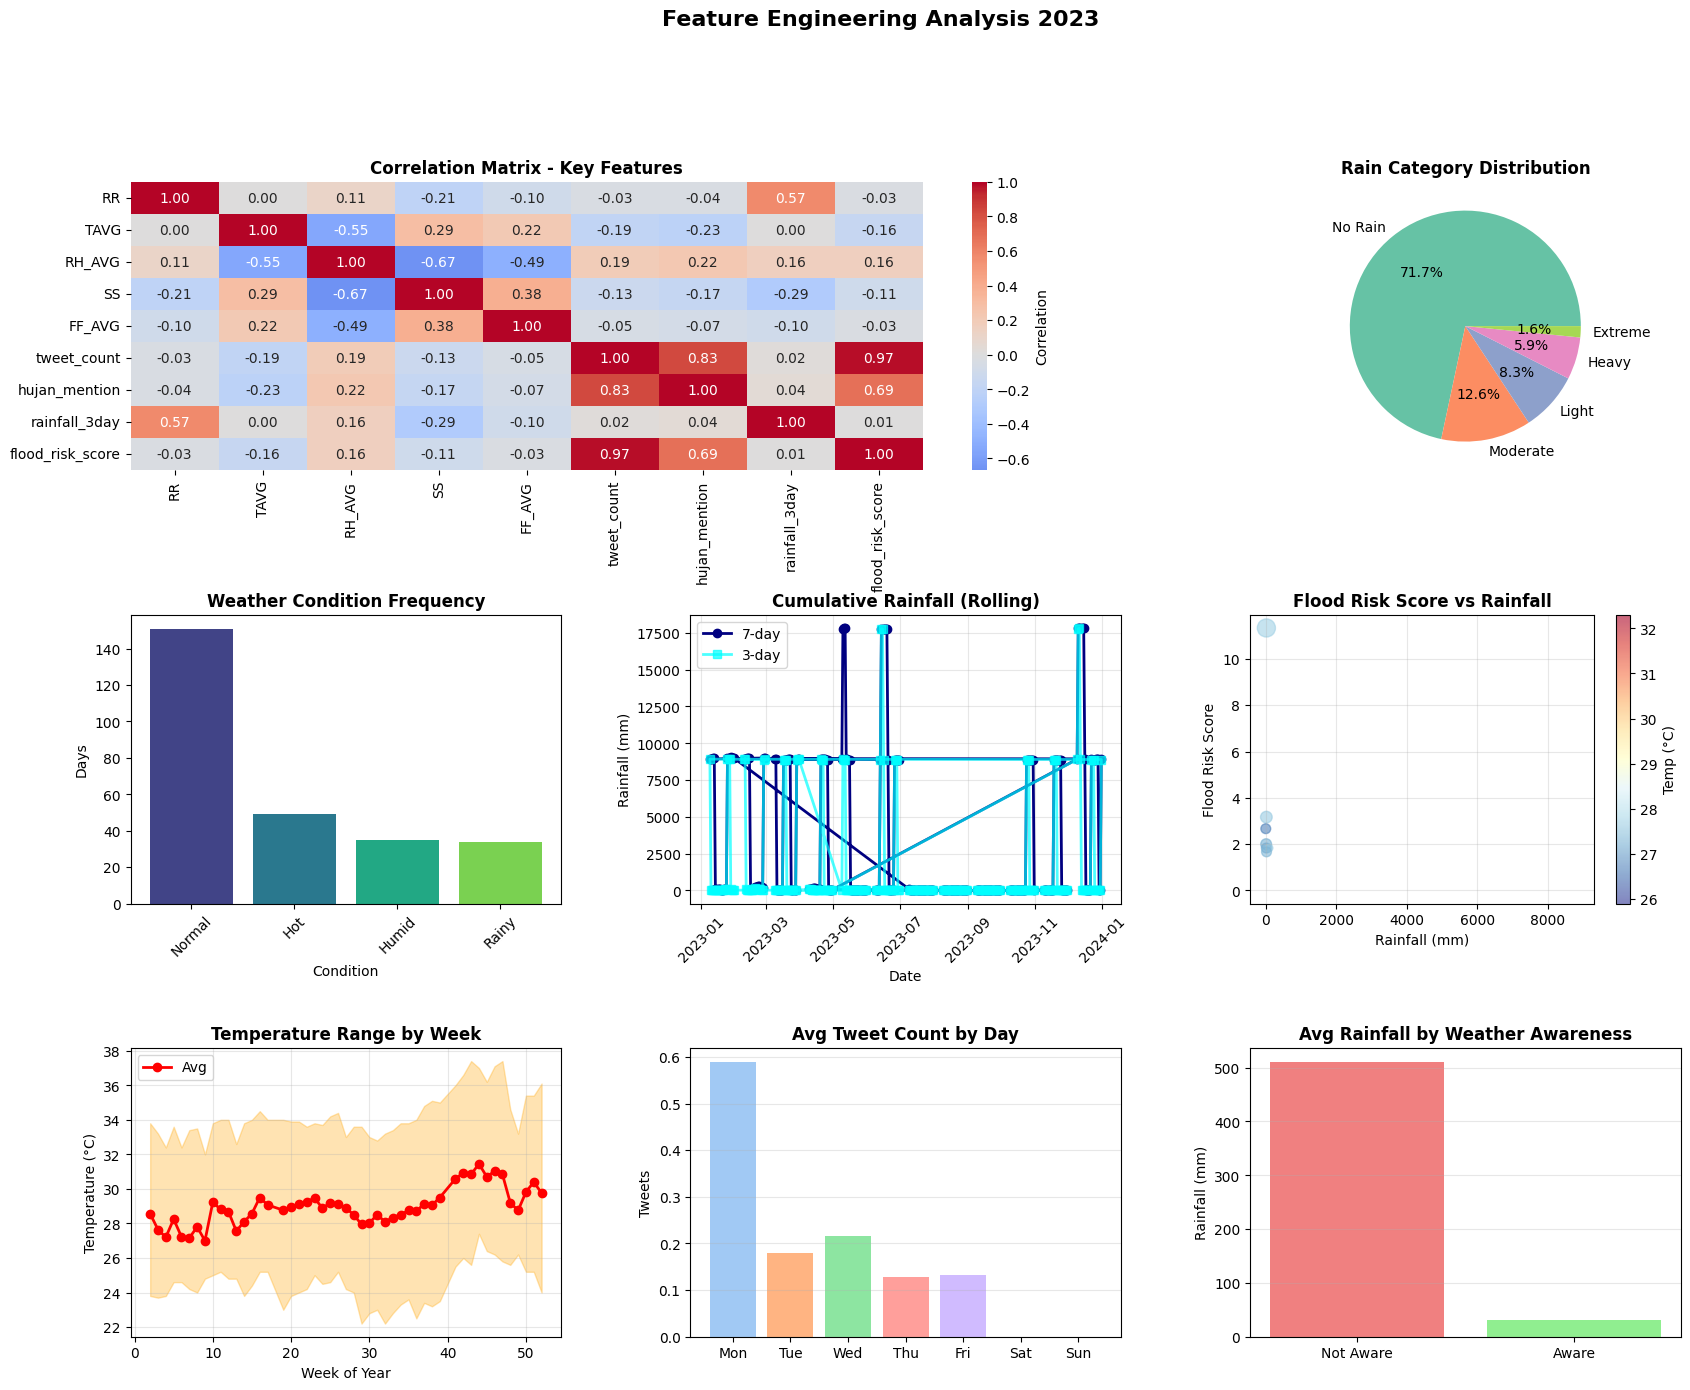

In [59]:
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(3, 3, hspace=0.5, wspace=0.3)

# Heatmap - Correlation Matrix
ax1 = fig.add_subplot(gs[0, :2])
key_features = ['RR', 'TAVG', 'RH_AVG', 'SS', 'FF_AVG', 'tweet_count', 
                'hujan_mention', 'rainfall_3day', 'flood_risk_score']
available_features = [f for f in key_features if f in df.columns]
sns.heatmap(df[available_features].corr(), annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, ax=ax1, cbar_kws={'label': 'Correlation'})
ax1.set_title('Correlation Matrix - Key Features', fontweight='bold', fontsize=12)

#Rain Category Distribution
ax2 = fig.add_subplot(gs[0, 2])
df['rain_category'].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%', 
                                         colors=sns.color_palette('Set2'))
ax2.set_title('Rain Category Distribution', fontweight='bold')
ax2.set_ylabel('')

#Weather Condition by Day
ax3 = fig.add_subplot(gs[1, 0])
weather_counts = df['weather_condition'].value_counts()
ax3.bar(weather_counts.index, weather_counts.values, color=sns.color_palette('viridis', len(weather_counts)))
ax3.set_title('Weather Condition Frequency', fontweight='bold')
ax3.set_xlabel('Condition')
ax3.set_ylabel('Days')
ax3.tick_params(axis='x', rotation=45)



#Cumulative Rainfall
ax4 = fig.add_subplot(gs[1, 1])
ax4.plot(df['TANGGAL'], df['rainfall_7day'], marker='o', linewidth=2, color='navy', label='7-day')
ax4.plot(df['TANGGAL'], df['rainfall_3day'], marker='s', linewidth=2, color='cyan', alpha=0.7, label='3-day')
ax4.set_title('Cumulative Rainfall (Rolling)', fontweight='bold')
ax4.set_xlabel('Date')
ax4.set_ylabel('Rainfall (mm)')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)


#Flood Risk Score
ax5 = fig.add_subplot(gs[1, 2])
ax5.scatter(df['RR'], df['flood_risk_score'], s=df['tweet_count']*10, 
            alpha=0.6, c=df['TAVG'], cmap='RdYlBu_r')
ax5.set_title('Flood Risk Score vs Rainfall', fontweight='bold')
ax5.set_xlabel('Rainfall (mm)')
ax5.set_ylabel('Flood Risk Score')
ax5.grid(True, alpha=0.3)
cbar = plt.colorbar(ax5.collections[0], ax=ax5)
cbar.set_label('Temp (°C)')

#Temperature Range by Week
ax6 = fig.add_subplot(gs[2, 0])
weekly_temp = df.groupby('week_of_year').agg({'TN': 'min', 'TX': 'max', 'TAVG': 'mean'})
ax6.fill_between(weekly_temp.index, weekly_temp['TN'], weekly_temp['TX'], alpha=0.3, color='orange')
ax6.plot(weekly_temp.index, weekly_temp['TAVG'], marker='o', linewidth=2, color='red', label='Avg')
ax6.set_title('Temperature Range by Week', fontweight='bold')
ax6.set_xlabel('Week of Year')
ax6.set_ylabel('Temperature (°C)')
ax6.legend()
ax6.grid(True, alpha=0.3)


#Social Media Activity Pattern
ax7 = fig.add_subplot(gs[2, 1])
daily_pattern = df.groupby('day_name')['tweet_count'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
ax7.bar(range(7), daily_pattern.values, color=sns.color_palette('pastel'))
ax7.set_xticks(range(7))
ax7.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax7.set_title('Avg Tweet Count by Day', fontweight='bold')
ax7.set_ylabel('Tweets')
ax7.grid(True, alpha=0.3, axis='y')


#Weather Awareness
ax8 = fig.add_subplot(gs[2, 2])
awareness_data = df.groupby('weather_awareness')['RR'].mean()
colors_aware = ['lightcoral', 'lightgreen']
ax8.bar(['Not Aware', 'Aware'], awareness_data.values, color=colors_aware)
ax8.set_title('Avg Rainfall by Weather Awareness', fontweight='bold')
ax8.set_ylabel('Rainfall (mm)')
ax8.grid(True, alpha=0.3, axis='y')

plt.suptitle('Feature Engineering Analysis 2023', 
             fontsize=16, fontweight='bold', y=0.995)


Text(0, 0.5, '')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0.995, 'Feature Engineering Analysis 2023')

<Figure size 640x480 with 0 Axes>

In [63]:
plt.savefig('../../data/visualization/take_home_analysis.png', dpi=300, bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: '../../data/visualization/take_home_analysis.png'

<Figure size 640x480 with 0 Axes>

In [64]:
import os

os.makedirs('../../visualization', exist_ok=True)
plt.savefig('../../visualization/take_home_analysis.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>